In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
cof_df = pd.read_csv("cost_of_living_us.csv")

cof_df.isna().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

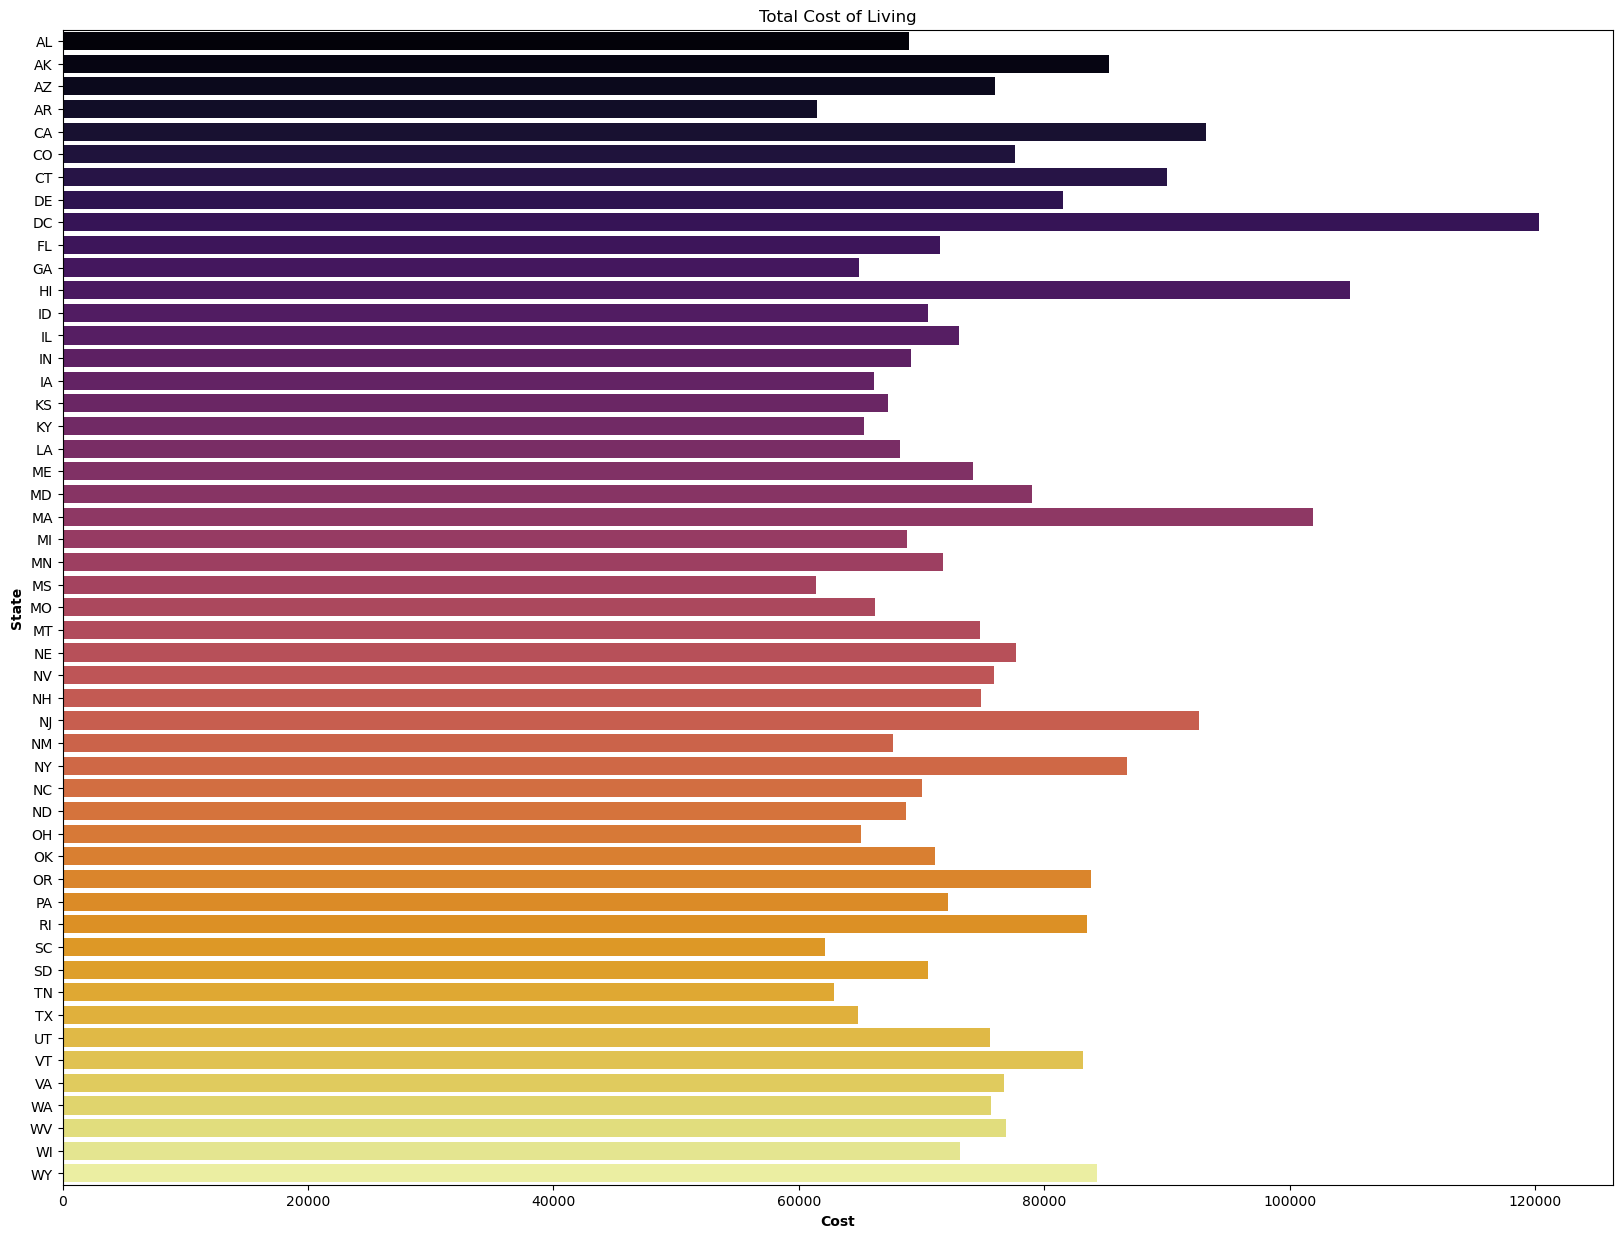

In [3]:
plt.figure(figsize=(20, 15))
sns.barplot(data=cof_df, x="total_cost", y= "state", errorbar=None, palette='inferno')
plt.title('Total Cost of Living')
plt.xlabel('Cost', fontsize=10, fontweight='bold', fontfamily='sans-serif')
plt.ylabel('State', fontsize=10, fontweight='bold', fontfamily='sans-serif')
plt.show()

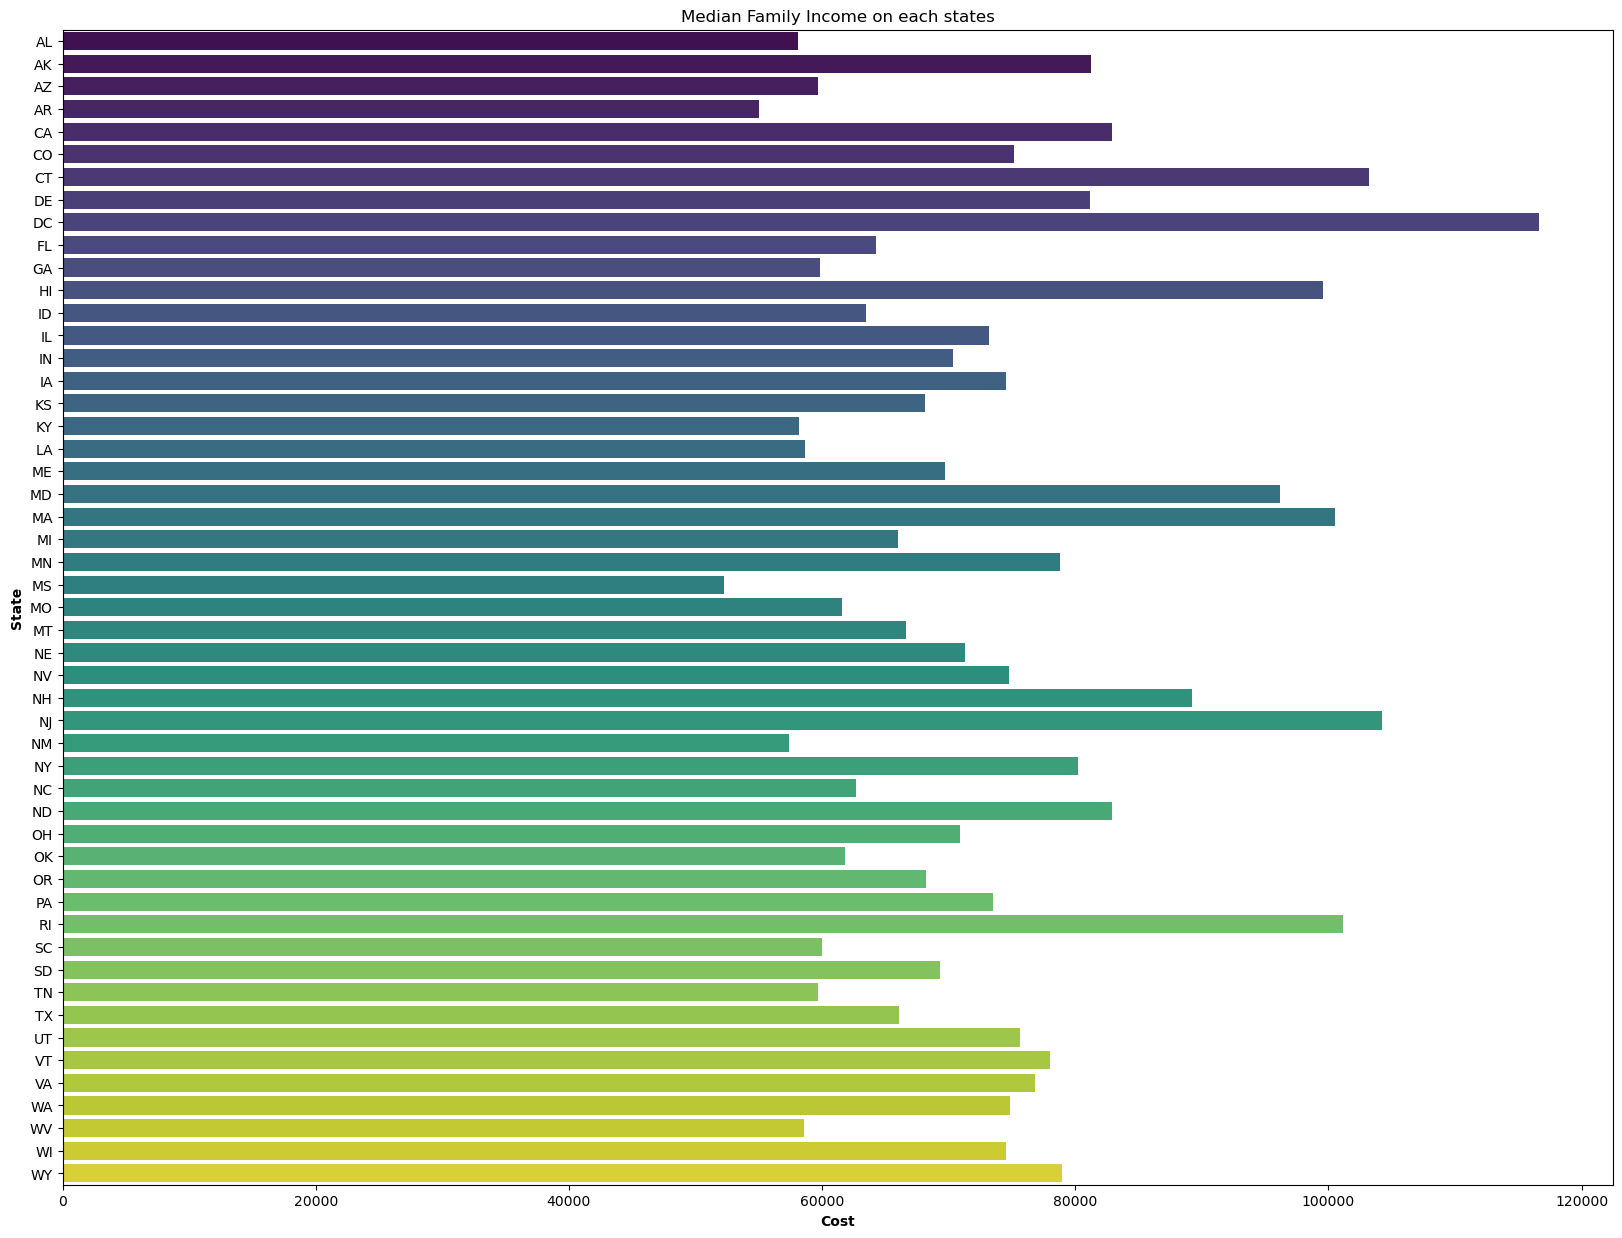

In [4]:
plt.figure(figsize=(20, 15))
sns.barplot(data=cof_df, x="median_family_income", y= "state", errorbar=None, palette='viridis')
plt.title('Median Family Income on each states')
plt.xlabel('Cost', fontsize=10, fontweight='bold', fontfamily='sans-serif')
plt.ylabel('State', fontsize=10, fontweight='bold', fontfamily='sans-serif')
plt.show()

In [17]:

def state_encoder():
    lab_en = LabelEncoder()
    # print(cof_df.head(5))
    # cof_df_trans = lab_en.fit_transform(cof_df['state']) this makes the pandas df to a numpy nd array
    cof_df['state'] = lab_en.fit_transform(cof_df['state']) # this will do encoding without changing the type of df
    cof_df.info()

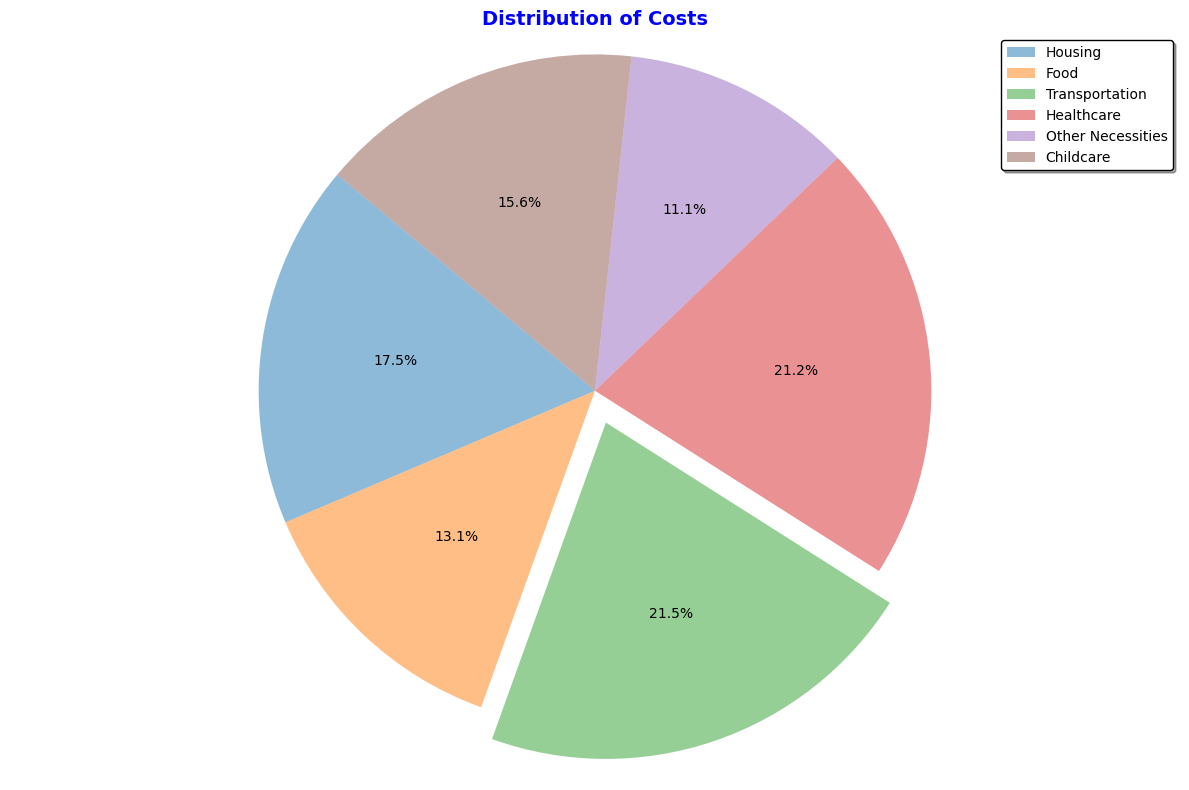

In [18]:
hcost_sum = cof_df['housing_cost'].sum()
fcost_sum = cof_df['food_cost'].sum()
tcost_sum = cof_df['transportation_cost'].sum()
healthcare_cost_sum = cof_df['healthcare_cost'].sum()
other_necessities_cost_sum = cof_df['other_necessities_cost'].sum()
childcare_cost_sum = cof_df['childcare_cost'].sum()

labels = ['Housing', 'Food', 'Transportation', 'Healthcare', 'Other Necessities', 'Childcare']
sizes = [hcost_sum, fcost_sum, tcost_sum, healthcare_cost_sum, other_necessities_cost_sum, childcare_cost_sum]

# Explode effect (separate the slices)
explode = (0, 0, 0.1, 0, 0, 0)

# Lighter colors with adjusted alpha values
light_colors = [(r, g, b, 0.5) for r, g, b in plt.cm.tab10.colors]

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140, shadow=False, explode=explode, colors = light_colors)
plt.title('Distribution of Costs', fontsize=14, fontweight='bold', color='blue')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(labels, loc='best', fontsize='medium', shadow=True, frameon=True, edgecolor='black')

# Show the plot
plt.tight_layout()
plt.show()

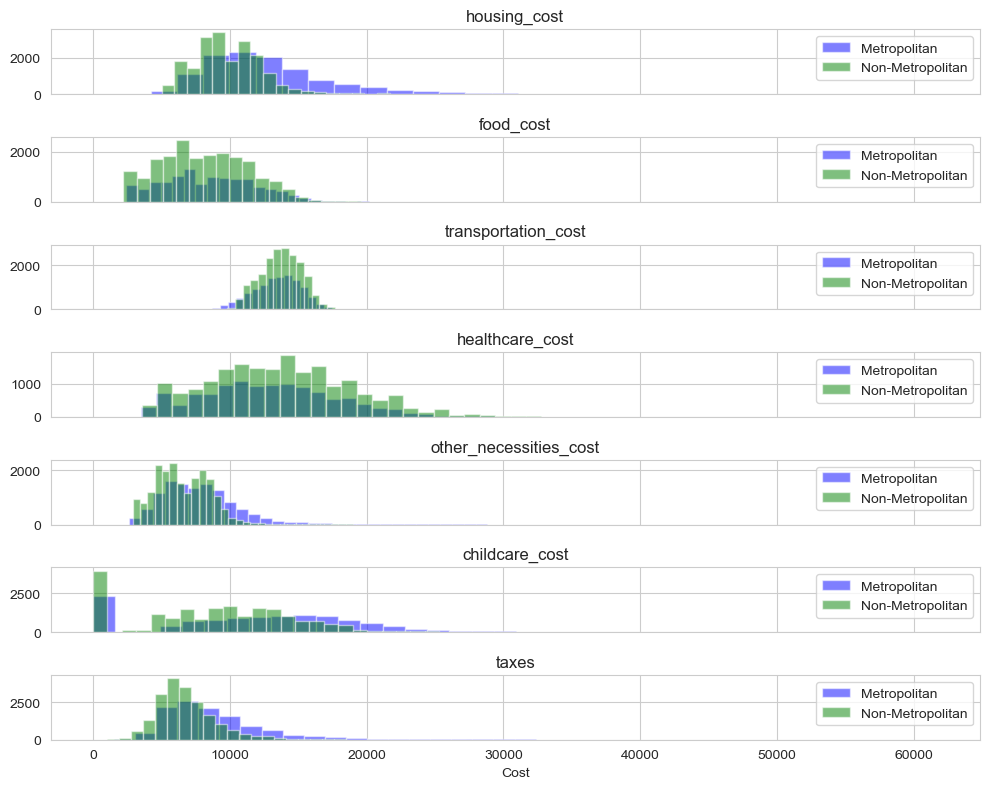

In [21]:
# Filter data for metropolitan and non-metropolitan areas
metro_data = cof_df[cof_df['isMetro'] == 1]
non_metro_data = cof_df[cof_df['isMetro'] == 0]

# Define the cost columns to visualize
cost_columns = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

# Set up subplots for each cost category
fig, axes = plt.subplots(nrows=len(cost_columns), ncols=1, figsize=(10, 8), sharex=True)

# Plot distribution for each cost category in metropolitan areas
for i, cost_col in enumerate(cost_columns):
    axes[i].hist(metro_data[cost_col], bins=30, alpha=0.5, color='blue', label='Metropolitan')
    axes[i].set_title(cost_col)
    axes[i].legend()

# Plot distribution for each cost category in non-metropolitan areas
for i, cost_col in enumerate(cost_columns):
    axes[i].hist(non_metro_data[cost_col], bins=30, alpha=0.5, color='green', label='Non-Metropolitan')
    axes[i].set_title(cost_col)
    axes[i].legend()

# Add labels and title
plt.xlabel('Cost')
plt.tight_layout()
plt.show()


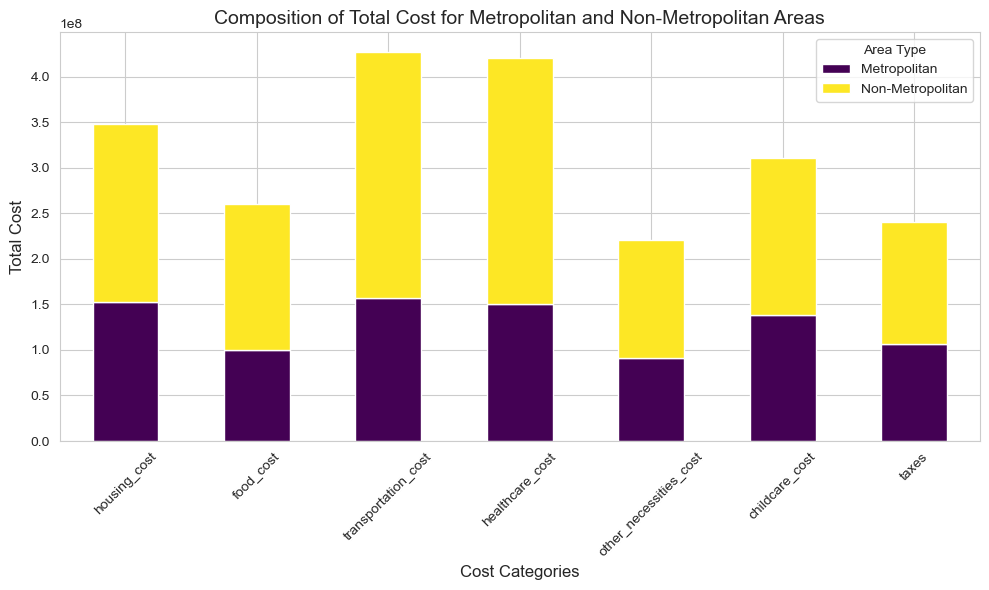

In [22]:
# Filter data for metropolitan and non-metropolitan areas
metro_data = cof_df[cof_df['isMetro'] == 1]
non_metro_data = cof_df[cof_df['isMetro'] == 0]

# Define the cost categories
cost_categories = ['housing_cost', 'food_cost', 'transportation_cost',
                  'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

# Calculate the total cost for each category for metropolitan and non-metropolitan areas
metro_total_cost = metro_data[cost_categories].sum()
non_metro_total_cost = non_metro_data[cost_categories].sum()

# Create a dataframe for plotting
plot_data = pd.DataFrame({'Metropolitan': metro_total_cost, 'Non-Metropolitan': non_metro_total_cost})

# Set a cooler style using seaborn
sns.set_style("whitegrid")

# Plot the stacked bar chart
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')  # Use 'viridis' colormap for cooler colors

# Add labels and title
plt.xlabel('Cost Categories', fontsize=12)
plt.ylabel('Total Cost', fontsize=12)
plt.title('Composition of Total Cost for Metropolitan and Non-Metropolitan Areas', fontsize=14)
plt.legend(title='Area Type', fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

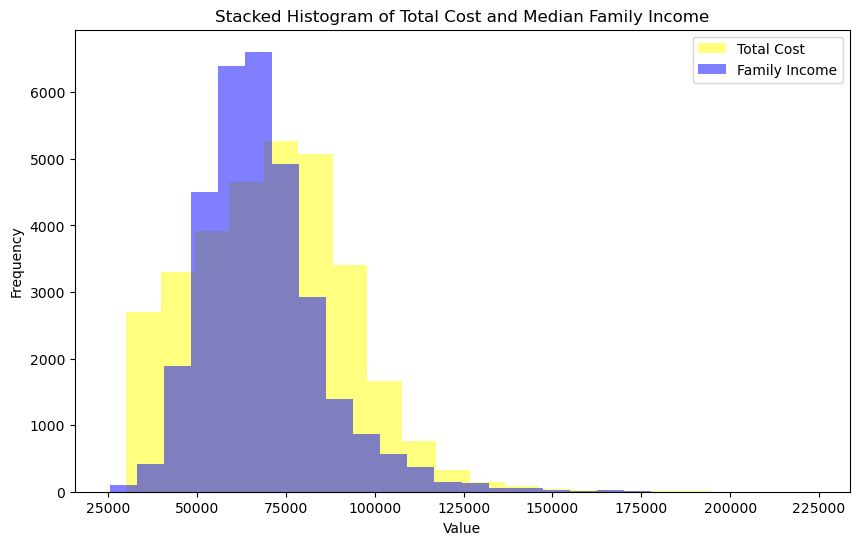

In [5]:
# Plot stacked histograms for total cost and median family income
plt.figure(figsize=(10, 6))
# Plot histogram for total cost for metropolitan areas
plt.hist(cof_df['total_cost'], bins=20, color='yellow', alpha=0.5, label='Total Cost', stacked=True)
# Plot histogram for median family income for metropolitan areas
plt.hist(cof_df['median_family_income'], bins=20, color='blue', alpha=0.5, label='Family Income', stacked=True)
# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Total Cost and Median Family Income')
plt.legend()

# Show plot
plt.show()

In [15]:
print(cof_df['family_member_count'].unique())

# Perform one-hot encoding
df_encoded = pd.get_dummies(cof_df['family_member_count'], prefix='family_member_count')

# Convert the one-hot encoded columns from string to integer
df_encoded = df_encoded.astype(int)

# Concatenate the original DataFrame with the one-hot encoded columns
df_final = pd.concat([cof_df, df_encoded], axis=1)
df_final.head(8)

['1p0c' '1p1c' '1p2c' '1p3c' '1p4c' '2p0c' '2p1c' '2p2c' '2p3c' '2p4c']


,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,family_member_count_1p0c,family_member_count_1p1c,family_member_count_1p2c,family_member_count_1p3c,family_member_count_1p4c,family_member_count_2p0c,family_member_count_2p1c,family_member_count_2p2c,family_member_count_2p3c,family_member_count_2p4c
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,1,0,0,0,0,0,0,0,0,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,0,1,0,0,0,0,0,0,0,0
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,...,0,0,1,0,0,0,0,0,0,0
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,...,0,0,0,1,0,0,0,0,0,0
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,...,0,0,0,0,1,0,0,0,0,0
5,1,AL,True,"Montgomery, AL MSA",Autauga County,2p0c,10180.29420,6334.01436,12861.88680,11474.95968,...,0,0,0,0,0,1,0,0,0,0
6,1,AL,True,"Montgomery, AL MSA",Autauga County,2p1c,12067.50240,7883.31888,13589.11200,14397.03720,...,0,0,0,0,0,0,1,0,0,0
7,1,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,12067.50240,9984.05268,14723.60760,17319.11280,...,0,0,0,0,0,0,0,1,0,0
